# Last Assignment - Course Review
## Manuel Santos - 2019231352

In [ ]:
%%capture
%pip install qiskit pylatexenc

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

simulator = StatevectorSampler()

## Alínea 3(a)

In [ ]:
# Criar circuito aqui
bell_qubits = QuantumRegister(2, 'q')

bell_circuit = QuantumCircuit(bell_qubits)
bell_circuit.h(bell_qubits[0])
bell_circuit.cx(bell_qubits[0], bell_qubits[1])

bell_circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [ ]:
print(bell_circuit.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \ctrl{1} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \targ & \qw & \qw\\
\\ }}
\end{document}


## Alínea 3(b)

In [ ]:
# Criar circuito aqui
q = QuantumRegister(4, 'q')

circuit = QuantumCircuit(q)

circuit.h(q[0])
circuit.cx(q[0], q[2])

circuit.barrier()

circuit.h(q[1])
circuit.cx(q[1], q[3])

circuit.barrier()

circuit.cx(q[0], q[1])
circuit.h(q[0])

circuit.measure_all()

circuit.draw()

┌───┐      ░            ░      ┌───┐ ░ ┌─┐         
   q_0: ┤ H ├──■───░────────────░───■──┤ H ├─░─┤M├─────────
        └───┘  │   ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐      
   q_1: ───────┼───░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────
             ┌─┴─┐ ░ └───┘  │   ░ └───┘      ░  ║ └╥┘┌─┐   
   q_2: ─────┤ X ├─░────────┼───░────────────░──╫──╫─┤M├───
             └───┘ ░      ┌─┴─┐ ░            ░  ║  ║ └╥┘┌─┐
   q_3: ───────────░──────┤ X ├─░────────────░──╫──╫──╫─┤M├
                   ░      └───┘ ░            ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════════════════════╩══╩══╩══╩═
                                                0  1  2  3

In [ ]:
print(bell_circuit.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \ctrl{1} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \targ & \qw & \qw\\
\\ }}
\end{document}


## Alínea 3(c)

In [ ]:
# Simulação
runs = 1024
job = simulator.run([circuit], shots=runs)
result = job.result()[0]
counts = result.data.meas.get_counts()

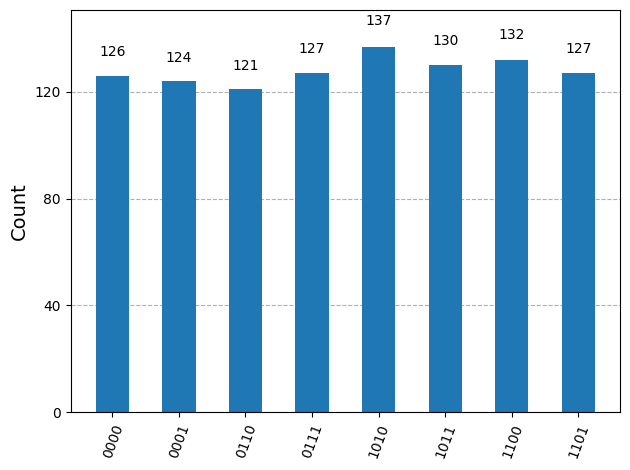

In [ ]:
# Visualização do histograma
plot_histogram(counts)